In [1]:
import abacus_cosmos.Halos as ach
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
rock_data = ach.read_halos_Rockstar("../data/AbacusCosmos_720box_planck_00_0_rockstar_halos/z0.1/")

In [6]:
rock_data.dtype

dtype([('id', '<i8'), ('parent_id', '<i8'), ('pos', '<f4', (3,)), ('vel', '<f4', (3,)), ('corevel', '<f4', (3,)), ('bulkvel', '<f4', (3,)), ('m', '<f4'), ('m_SO', '<f4'), ('r', '<f4'), ('child_r', '<f4'), ('vmax_r', '<f4'), ('mgrav', '<f4'), ('vmax', '<f4'), ('rvmax', '<f4'), ('rs', '<f4'), ('klypin_rs', '<f4'), ('vrms', '<f4'), ('J', '<f4', (3,)), ('energy', '<f4'), ('spin', '<f4'), ('alt_m', '<f4', (4,)), ('alt_m_SO', '<f4', (4,)), ('Xoff', '<f4'), ('Voff', '<f4'), ('b_to_a', '<f4'), ('c_to_a', '<f4'), ('A', '<f4', (3,)), ('b_to_a2', '<f4'), ('c_to_a2', '<f4'), ('A2', '<f4', (3,)), ('bullock_spin', '<f4'), ('kin_to_pot', '<f4'), ('m_pe_b', '<f4'), ('m_pe_d', '<f4'), ('halfmass_radius', '<f4'), ('num_p', '<i8'), ('num_child_particles', '<i8'), ('p_start', '<i8'), ('desc', '<i8'), ('flags', '<i8'), ('n_core', '<i8'), ('subsamp_start', '<i8'), ('subsamp_len', '<i8'), ('min_pos_err', '<f4'), ('min_vel_err', '<f4'), ('min_bulkvel_err', '<f4'), ('N', '<i4'), ('alt_N', '<i4', (4,)), ('N_SO'

In [14]:
vmax = rock_data['vmax']

In [15]:
pos = rock_data['pos']

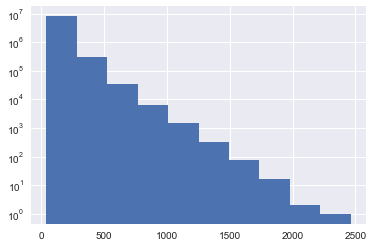

In [9]:
_ = plt.hist(vmax, log=True)

In [29]:
len(vmax), np.count_nonzero(vmax>150.0)

(8417897, 2181431)

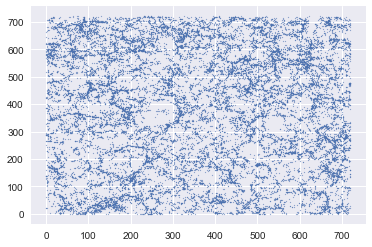

In [25]:
ii = (vmax>200) & (pos[:,2]>700)
plt.scatter(pos[ii,0], pos[ii,1], alpha=0.5, s=1.0)

In [8]:
np.count_nonzero(sigma_v>500)

162914

In [9]:
pos = halo_data['pos']

(0, 200)

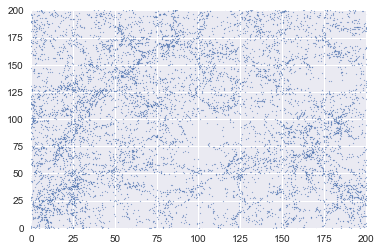

In [18]:
ii = (sigma_v>50) & (pos[:,2]>500)
plt.scatter(pos[ii,0], pos[ii,1], alpha=0.5, s=1.0)
plt.xlim([0,200])
plt.ylim([0,200])

In [162]:
delta_center = 200
radius = 100
box =0 
for center_i in [-1,0,1]:
    for center_j in [-1,0,1]:
        for center_k in [-1,0,1]:
            center_x = center_i * delta_center
            center_y = center_j * delta_center
            center_z = center_k * delta_center
            r = np.sqrt((pos[:,0]-center_x)**2 + (pos[:,1]-center_y)**2 + (pos[:,2]-center_z)**2)
            ll = (r>radius) & (r<radius+10)
            pos_shell = pos[ll]
            print(center_i, center_j, center_k, len(pos_shell))
            np.savetxt("shell_data_box_{}.dat".format(box), pos_shell)
            box += 1

-1 -1 -1 6298
-1 -1 0 7206
-1 -1 1 6677
-1 0 -1 6589
-1 0 0 6196
-1 0 1 6877
-1 1 -1 5870
-1 1 0 7060
-1 1 1 6359
0 -1 -1 7027
0 -1 0 6446
0 -1 1 6258
0 0 -1 6846
0 0 0 6856
0 0 1 7205
0 1 -1 6732
0 1 0 6507
0 1 1 6226
1 -1 -1 7053
1 -1 0 6124
1 -1 1 6371
1 0 -1 6931
1 0 0 6660
1 0 1 6571
1 1 -1 6961
1 1 0 6875
1 1 1 6203


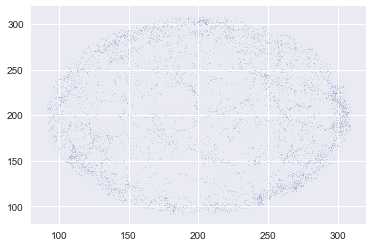

In [55]:
plt.scatter(pos_shell[:,0], pos_shell[:,1], alpha=0.5, s=0.1)

In [56]:
np.savetxt("shell_data.dat", pos_shell)

In [61]:
!wc -l beta_1.1.dat
!wc -l beta_1.2.dat
!wc -l beta_1.4.dat

   24930 beta_1.1.dat
   22974 beta_1.2.dat
   19894 beta_1.4.dat


In [157]:
def entropy_beta_file(filename):
    # remove duplicates
    beta_data = np.sort(np.int_(np.loadtxt(filename)))
    #print(len(beta_data))
    beta_data  = np.unique(beta_data, axis=0)
    beta_data = beta_data.flatten()
    #print(len(beta_data))
    beta_link_count = Counter(Counter(beta_data).values())

    proba = []
    total_link = np.sum(list(beta_link_count.values()))
    for k in beta_link_count:
        #print(k)
        proba.append(beta_link_count[k]/total_link)
    proba = np.array(proba)
    entropy = np.sum(-proba*np.log(proba))
    return entropy


In [168]:
entropy = []
for i_d in range(0,10):
    filename = 'beta_1.{}.dat'.format(i_d)
    entropy.append(entropy_beta_file(filename))
np.savetxt("entropy.txt", entropy)


entropy = []
for i_d in range(0,10):
    filename = 'beta_1.{}_box_0.dat'.format(i_d)
    entropy.append(entropy_beta_file(filename))
np.savetxt("entropy_box_0.txt", entropy)

entropy = []
for i_d in range(0,10):
    filename = 'beta_1.{}_box_9.dat'.format(i_d)
    entropy.append(entropy_beta_file(filename))
np.savetxt("entropy_box_9.txt", entropy)

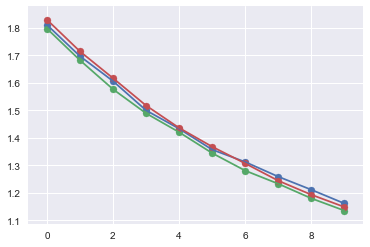

In [171]:
entropy = np.loadtxt("entropy.txt")
plt.plot(range(0,10), entropy)
plt.scatter(range(0,10), entropy)


entropy0 = np.loadtxt("entropy_box_0.txt")
plt.plot(range(0,10), entropy0)
plt.scatter(range(0,10), entropy0)



entropy9 = np.loadtxt("entropy_box_9.txt")
plt.plot(range(0,10), entropy9)
plt.scatter(range(0,10), entropy9)